## About the datasets

SportsStats (Olympics Dataset - 120 years of data) is a sports analysis firm partnering with local news and elite personal trainers to provide “interesting” insights to help their partners.  
Insights could be patterns/trends highlighting certain groups/events/countries, etc. for the purpose of developing a news story or discovering key health insights.

In [88]:
import pandas as pd

In [221]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [304]:
plt.style.use('seaborn-dark')

## Prep for Data Analysis

In [89]:
path1 = '/Users/azumi/Private/Learning/coursera/Learning SQL Basics for Data Science Specialization/SQL for Data Science Capstone Project/SportsStats/athlete_events.csv'
path2 = '/Users/azumi/Private/Learning/coursera/Learning SQL Basics for Data Science Specialization/SQL for Data Science Capstone Project/SportsStats/noc_regions.csv'

df_athlete = pd.read_csv(path1)
df_athlete.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [90]:
df_region = pd.read_csv(path2)
df_region.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [91]:
df_athlete.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [92]:
df_athlete.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [93]:
df_region.describe()

,NOC,region,notes
count,230,227,21
unique,230,206,21
top,AFG,Germany,Netherlands Antilles
freq,1,4,1


In [94]:
df_region.dtypes

NOC       object
region    object
notes     object
dtype: object

In [95]:
import sqlite3

con = sqlite3.connect("project.db")
df_athlete.to_sql(name="athlete",con=con,if_exists='replace',index=False)
df_region.to_sql(name="region",con=con,if_exists='replace',index=False)
con.commit()
%load_ext sql
%sql sqlite:///project.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [96]:
%%sql

CREATE TABLE IF NOT EXISTS sportsstats
AS 
    SELECT 
        *
    FROM 
        athlete 
    INNER JOIN
        region
    ON 
        athlete.NOC = region.NOC


 * sqlite:///project.db
Done.


[]

In [97]:
%%sql

SELECT * FROM sportsstats LIMIT 10

 * sqlite:///project.db
Done.


ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,NOC:1,region,notes
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,CHN,China,None
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,CHN,China,None
3,Gunnar Nielsen Aaby,M,24.0,None,None,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None,DEN,Denmark,None
4,Edgar Lindenau Aabye,M,34.0,None,None,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,DEN,Denmark,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,NED,Netherlands,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",None,NED,Netherlands,None
5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,None,NED,Netherlands,None
5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",None,NED,Netherlands,None
5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,None,NED,Netherlands,None
5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",None,NED,Netherlands,None


In [98]:
%%sql

CREATE TABLE IF NOT EXISTS olympic_medalists
AS
    SELECT 
        *
    FROM 
        sportsstats 
    WHERE
        Medal IS NOT NULL

 * sqlite:///project.db
Done.


[]

In [99]:
%%sql

SELECT * FROM olympic_medalists LIMIT 10

 * sqlite:///project.db
Done.


ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
4,Edgar Lindenau Aabye,M,34.0,None,None,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,None
15,Arvo Ossian Aaltonen,M,30.0,None,None,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,None
15,Arvo Ossian Aaltonen,M,30.0,None,None,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,None
16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland,None
17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,None
17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,None
17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,None
17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,None
17,Paavo Johannes Aaltonen,M,32.0,175.0,64.0,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Team All-Around,Bronze,Finland,None
20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,None


In [100]:
%%sql

ALTER TABLE olympic_medalists DROP COLUMN 'NOC:1'	

 * sqlite:///project.db
(sqlite3.OperationalError) no such column: "'NOC:1'"
[SQL: ALTER TABLE olympic_medalists DROP COLUMN 'NOC:1']
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [101]:
%%sql

SELECT * FROM olympic_medalists LIMIT 10

 * sqlite:///project.db
Done.


ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
4,Edgar Lindenau Aabye,M,34.0,None,None,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,None
15,Arvo Ossian Aaltonen,M,30.0,None,None,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,None
15,Arvo Ossian Aaltonen,M,30.0,None,None,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,None
16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland,None
17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,None
17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,None
17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,None
17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,None
17,Paavo Johannes Aaltonen,M,32.0,175.0,64.0,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Team All-Around,Bronze,Finland,None
20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,None


In [102]:
olympic_medalists = pd.read_sql('SELECT * FROM olympic_medalists', con=con)
olympic_medalists.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,None
1,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,None
2,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,None
3,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland,None
4,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,None


In [103]:
olympic_medalists.describe(include='all')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
count,39774.000000,39774,39774,39042.000000,31063.000000,30447.000000,39774,39774,39774,39774.000000,39774,39774,39774,39774,39774,39774,545
unique,NaN,28197,2,NaN,NaN,NaN,497,148,51,NaN,2,42,66,756,3,136,11
top,NaN,"Michael Fred Phelps, II",M,NaN,NaN,NaN,United States,USA,2008 Summer,NaN,Summer,London,Athletics,Football Men's Football,Gold,USA,Yugoslavia
freq,NaN,28,28528,NaN,NaN,NaN,5219,5637,2045,NaN,34079,3620,3969,1269,13371,5637,390
mean,69404.520139,NaN,NaN,25.925132,177.557898,73.774274,NaN,NaN,NaN,1973.936743,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,38849.700624,NaN,NaN,5.914471,10.892172,15.016399,NaN,NaN,NaN,33.822507,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,4.000000,NaN,NaN,10.000000,136.000000,28.000000,NaN,NaN,NaN,1896.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,36496.500000,NaN,NaN,22.000000,170.000000,63.000000,NaN,NaN,NaN,1952.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,68985.000000,NaN,NaN,25.000000,178.000000,73.000000,NaN,NaN,NaN,1984.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,103459.750000,NaN,NaN,29.000000,185.000000,83.000000,NaN,NaN,NaN,2002.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
olympic_medalists.shape

(39774, 17)

In [105]:
olympic_medalists.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
region     object
notes      object
dtype: object

The number of medals by medal colors

In [424]:
%%sql

SELECT 
    Medal,
    COUNT(*) AS count
FROM
    olympic_medalists
GROUP BY
    Medal
ORDER BY
    count DESC

 * sqlite:///project.db
Done.


Medal,count
Gold,13371
Bronze,13291
Silver,13112


The number of medals by events

In [425]:
%%sql

SELECT 
    Event,
    COUNT(*) AS count
FROM
    olympic_medalists
GROUP BY
    Event
ORDER BY
    count DESC
LIMIT
    10

 * sqlite:///project.db
Done.


Event,count
Football Men's Football,1269
Ice Hockey Men's Ice Hockey,1230
Hockey Men's Hockey,1050
Water Polo Men's Water Polo,866
Rowing Men's Coxed Eights,730
Gymnastics Men's Team All-Around,713
Basketball Men's Basketball,687
Handball Men's Handball,588
Volleyball Men's Volleyball,495
Hockey Women's Hockey,478


### Create tables according to ERD

In [108]:
%%sql

CREATE TABLE IF NOT EXISTS Athletes
AS
    SELECT
        ID    AS athlete_ID,    --INT(6)
        Name  AS athlete_name,  --VARCHAR(93)
        Medal AS medal          --VARCHAR(6)
    FROM
        olympic_medalists;

CREATE TABLE IF NOT EXISTS Games
AS
    SELECT
        Games  AS games,      --VARCHAR(11)
        Year   AS year,       --INT(4)
        Season AS season,     --VARCHAR(6)
        City   AS city,       --VARCHAR(22)
        Sport  AS sport,      --VARCHAR(25)
        Event  AS event,      --VARCHAR(85)
        ID     AS athlete_ID  --INT(6)
    FROM
        olympic_medalists;

CREATE TABLE IF NOT EXISTS Regions
AS
    SELECT
        Team AS team,       --VARCHAR(47)
        region,             --VARCHAR(27)
        NOC,                --VARCHAR(3)
        notes,              --VARCHAR(27)
        ID   AS athlete_ID  --INT(6)
    FROM
        olympic_medalists;

CREATE TABLE IF NOT EXISTS Demographics
AS
    SELECT
        ID     AS athlete_ID,     --INT(6)
        Name   AS athlete_name,   --VARCHAR(93)
        Sex    AS sex,            --VARCHAR(1)
        Age    AS age,            --FLOAT(4)
        Height AS height,         --FLOAT(5)
        Weight AS weight          --FLOAT(16)
    FROM
        olympic_medalists;

 * sqlite:///project.db
Done.
Done.
Done.
Done.


[]

For future use, create pandas dataframes for these tables.

In [112]:
Athletes = pd.read_sql('SELECT * FROM Athletes', con=con)
Games = pd.read_sql('SELECT * FROM Games', con=con)
Regions = pd.read_sql('SELECT * FROM Regions', con=con)
Demographics = pd.read_sql('SELECT * FROM Demographics', con=con)

---

### Descriptive stats

First of all, run the code below to get a sense of how the data is organized, how the values are distributed.

In [ ]:
olympic_medalists.describe(include='all')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
count,39774.000000,39774,39774,39042.000000,31063.000000,30447.000000,39774,39774,39774,39774.000000,39774,39774,39774,39774,39774,39774,545
unique,NaN,28197,2,NaN,NaN,NaN,497,148,51,NaN,2,42,66,756,3,136,11
top,NaN,"Michael Fred Phelps, II",M,NaN,NaN,NaN,United States,USA,2008 Summer,NaN,Summer,London,Athletics,Football Men's Football,Gold,USA,Yugoslavia
freq,NaN,28,28528,NaN,NaN,NaN,5219,5637,2045,NaN,34079,3620,3969,1269,13371,5637,390
mean,69404.520139,NaN,NaN,25.925132,177.557898,73.774274,NaN,NaN,NaN,1973.936743,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,38849.700624,NaN,NaN,5.914471,10.892172,15.016399,NaN,NaN,NaN,33.822507,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,4.000000,NaN,NaN,10.000000,136.000000,28.000000,NaN,NaN,NaN,1896.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,36496.500000,NaN,NaN,22.000000,170.000000,63.000000,NaN,NaN,NaN,1952.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,68985.000000,NaN,NaN,25.000000,178.000000,73.000000,NaN,NaN,NaN,1984.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,103459.750000,NaN,NaN,29.000000,185.000000,83.000000,NaN,NaN,NaN,2002.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Same operations for each table

In [119]:
display(Athletes.describe(include='all'))
display(Games.describe(include='all'))
display(Regions.describe(include='all'))
display(Demographics.describe(include='all'))

,athlete_ID,athlete_name,medal
count,39774.000000,39774,39774
unique,NaN,28197,3
top,NaN,"Michael Fred Phelps, II",Gold
freq,NaN,28,13371
mean,69404.520139,NaN,NaN
std,38849.700624,NaN,NaN
min,4.000000,NaN,NaN
25%,36496.500000,NaN,NaN
50%,68985.000000,NaN,NaN
75%,103459.750000,NaN,NaN


,games,year,season,city,sport,event,athlete_ID
count,39774,39774.000000,39774,39774,39774,39774,39774.000000
unique,51,NaN,2,42,66,756,NaN
top,2008 Summer,NaN,Summer,London,Athletics,Football Men's Football,NaN
freq,2045,NaN,34079,3620,3969,1269,NaN
mean,NaN,1973.936743,NaN,NaN,NaN,NaN,69404.520139
std,NaN,33.822507,NaN,NaN,NaN,NaN,38849.700624
min,NaN,1896.000000,NaN,NaN,NaN,NaN,4.000000
25%,NaN,1952.000000,NaN,NaN,NaN,NaN,36496.500000
50%,NaN,1984.000000,NaN,NaN,NaN,NaN,68985.000000
75%,NaN,2002.000000,NaN,NaN,NaN,NaN,103459.750000


,team,region,NOC,notes,athlete_ID
count,39774,39774,39774,545,39774.000000
unique,497,136,148,11,NaN
top,United States,USA,USA,Yugoslavia,NaN
freq,5219,5637,5637,390,NaN
mean,NaN,NaN,NaN,NaN,69404.520139
std,NaN,NaN,NaN,NaN,38849.700624
min,NaN,NaN,NaN,NaN,4.000000
25%,NaN,NaN,NaN,NaN,36496.500000
50%,NaN,NaN,NaN,NaN,68985.000000
75%,NaN,NaN,NaN,NaN,103459.750000


,athlete_ID,athlete_name,sex,age,height,weight
count,39774.000000,39774,39774,39042.000000,31063.000000,30447.000000
unique,NaN,28197,2,NaN,NaN,NaN
top,NaN,"Michael Fred Phelps, II",M,NaN,NaN,NaN
freq,NaN,28,28528,NaN,NaN,NaN
mean,69404.520139,NaN,NaN,25.925132,177.557898,73.774274
std,38849.700624,NaN,NaN,5.914471,10.892172,15.016399
min,4.000000,NaN,NaN,10.000000,136.000000,28.000000
25%,36496.500000,NaN,NaN,22.000000,170.000000,63.000000
50%,68985.000000,NaN,NaN,25.000000,178.000000,73.000000
75%,103459.750000,NaN,NaN,29.000000,185.000000,83.000000


---

## Data Analysis

### Verify the hypothesis (a): Gold medal winners are concentrated in the age range of 20s – 30s years old.​

In [423]:
%%sql

SELECT
    Demographics.age,
    COUNT(DISTINCT(Demographics.athlete_ID)) AS count
FROM
    Demographics
INNER JOIN
    Athletes
ON
    Demographics.athlete_ID = Athletes.athlete_ID AND Athletes.medal = 'Gold'
GROUP BY
    Demographics.age
LIMIT
    20

 * sqlite:///project.db
Done.


age,count
None,132
12.0,1
13.0,8
14.0,25
15.0,63
16.0,105
17.0,181
18.0,310
19.0,470
20.0,725


In [411]:
gold_medalists_age = pd.read_sql('''SELECT
                                        Demographics.age,
                                        COUNT(DISTINCT(Demographics.athlete_ID)) AS count
                                    FROM
                                        Demographics
                                    INNER JOIN
                                        Athletes
                                    ON
                                        Demographics.athlete_ID = Athletes.athlete_ID AND Athletes.medal = 'Gold'
                                    GROUP BY
                                        Demographics.age''', con=con)
gold_medalists_age.dropna(inplace=True)

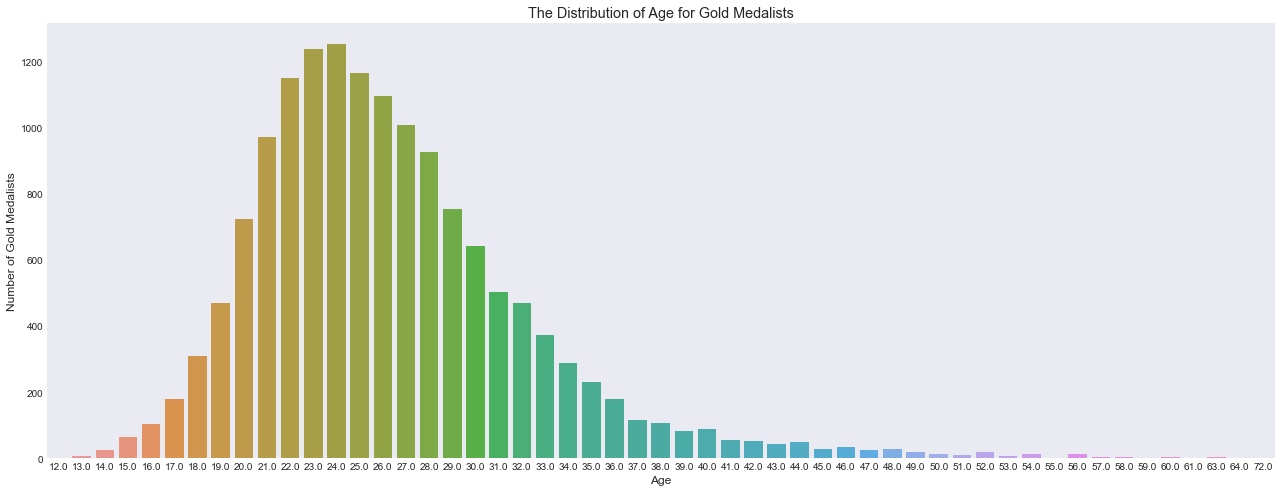

In [431]:
fig = plt.figure(figsize=(22,8))
sns.barplot(x='age',y='count', data=gold_medalists_age)
plt.xlabel('Age')
plt.ylabel('Number of Gold Medalists')
plt.title('The Distribution of Age for Gold Medalists')
plt.show()

---

### Verify the hypothesis (b): The majority of gold medal winners are from the developed countries like the United States, Great Britain, Germany, and so on.​

In [421]:
%%sql

SELECT
    Regions.team,
    COUNT(DISTINCT(Regions.athlete_ID)) AS count
FROM
    Regions
INNER JOIN
    Athletes
ON
    Regions.athlete_ID = Athletes.athlete_ID AND Athletes.medal = 'Gold'
GROUP BY
    Regions.team
ORDER BY
    count DESC
LIMIT
    15

 * sqlite:///project.db
Done.


team,count
United States,1794
Soviet Union,817
Germany,567
Great Britain,439
Italy,422
Sweden,367
France,365
Canada,346
Russia,311
Hungary,303


In [419]:
gold_medalists_countries = pd.read_sql('''SELECT
                                              Regions.team,
                                              COUNT(DISTINCT(Regions.athlete_ID)) AS count
                                          FROM
                                              Regions
                                          INNER JOIN
                                              Athletes
                                          ON
                                              Regions.athlete_ID = Athletes.athlete_ID AND Athletes.medal = 'Gold'
                                          GROUP BY
                                              Regions.team
                                          ORDER BY
                                              count DESC
                                          LIMIT
                                              15''', con=con)

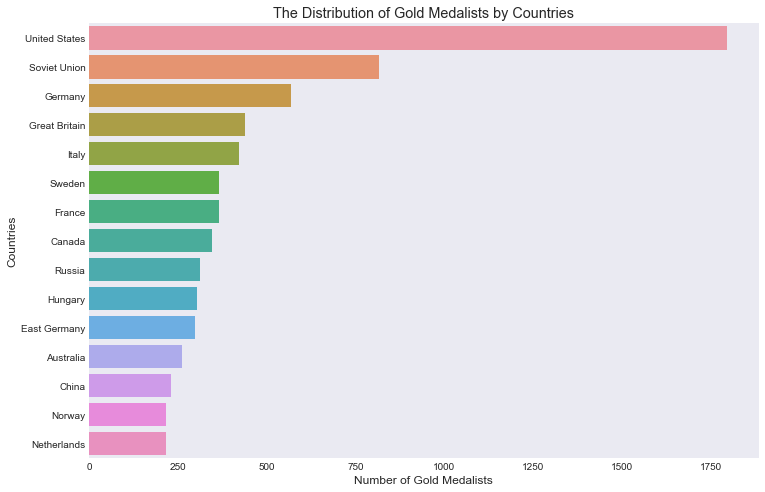

In [430]:
fig = plt.figure(figsize=(12,8))
sns.barplot(x='count',y='team', data=gold_medalists_countries)
plt.xlabel('Number of Gold Medalists')
plt.ylabel('Countries')
plt.title('The Distribution of Gold Medalists by Countries')
plt.show()

---

### Verify the hypothesis (c): American athlete has won the most medals

In [500]:
%%sql 

SELECT 
    Athletes.athlete_ID,
    Athletes.athlete_name,
    Regions.team,
    Athletes.count_medals
FROM
    Regions
INNER JOIN
    (
    SELECT
        athlete_ID,
        athlete_name,
        COUNT(medal) AS count_medals
    FROM
        Athletes
    GROUP BY
        athlete_ID,
        athlete_name
    ) Athletes
ON
    Athletes.athlete_ID = Regions.athlete_ID
GROUP BY
    Athletes.athlete_ID,
    Athletes.athlete_name,
    Regions.team
ORDER BY
    count_medals DESC
LIMIT
    15

 * sqlite:///project.db
Done.


athlete_ID,athlete_name,team,count_medals
94406,"Michael Fred Phelps, II",United States,28
67046,Larysa Semenivna Latynina (Diriy-),Soviet Union,18
4198,Nikolay Yefimovich Andrianov,Soviet Union,15
11951,Ole Einar Bjrndalen,Norway,13
74420,Edoardo Mangiarotti,Italy,13
89187,Takashi Ono,Japan,13
109161,Borys Anfiyanovych Shakhlin,Soviet Union,13
23426,Natalie Anne Coughlin (-Hall),United States,12
35550,Birgit Fischer-Schmidt,East Germany,12
35550,Birgit Fischer-Schmidt,Germany,12


---

## Deeper Analysis

### Relationthip between the year of the Olympics and the number of medalists

First of all, I want to see the relationship between the years and the number of medalists so far.

In [239]:
%%sql

SELECT 
    Games.year,
    COUNT(Athletes.athlete_ID) AS medalists
FROM
    Athletes
INNER JOIN
    Games
ON
    Athletes.athlete_ID = Games.athlete_ID
GROUP BY
    Games.year
ORDER BY
    Games.year

 * sqlite:///project.db
Done.


year,medalists
1896,317
1900,1143
1904,1039
1906,1001
1908,1424
1912,1683
1920,2669
1924,1909
1928,1488
1932,1336


In [240]:
year_medalists = pd.read_sql('''SELECT 
                                    Games.year,
                                    COUNT(Athletes.athlete_ID) AS medalists
                                FROM
                                    Athletes
                                INNER JOIN
                                    Games
                                ON
                                    Athletes.athlete_ID = Games.athlete_ID
                                GROUP BY
                                    Games.year
                                ORDER BY
                                    Games.year''', con=con)

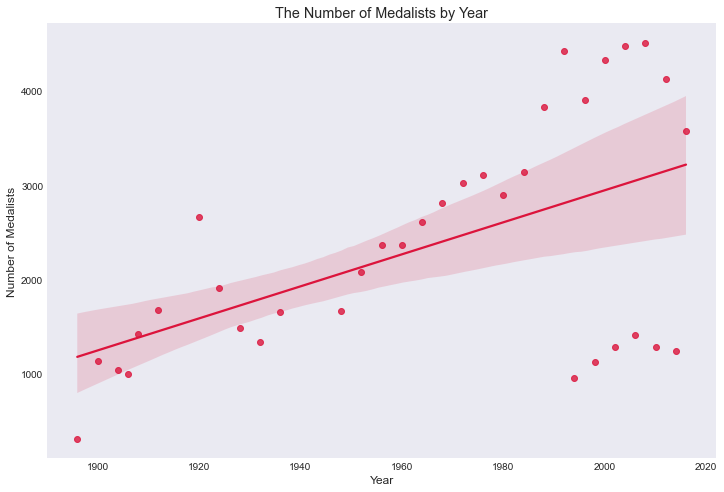

In [429]:
plt.figure(figsize=(12,8))
sns.regplot(x='year',y='medalists', data=year_medalists, color='crimson')
plt.xlabel('Year')
plt.ylabel('Number of Medalists')
plt.title('The Number of Medalists by Year')
plt.show()

The graph shows that, broadly speaking, the number of medal winners has increased each year. 
However, a series of data with values that deviate significantly from the regression line can be seen after 1994.

In [244]:
%%sql

SELECT 
    Games.year,
    Games.games,
    Games.season,
    COUNT(Athletes.athlete_ID) AS medalists
FROM
    Athletes
INNER JOIN
    Games
ON
    Athletes.athlete_ID = Games.athlete_ID
GROUP BY
    Games.year,
    Games.games,
    Games.season
ORDER BY
    Games.year

 * sqlite:///project.db
Done.


year,games,season,medalists
1896,1896 Summer,Summer,317
1900,1900 Summer,Summer,1143
1904,1904 Summer,Summer,1039
1906,1906 Summer,Summer,1001
1908,1908 Summer,Summer,1424
1912,1912 Summer,Summer,1683
1920,1920 Summer,Summer,2669
1924,1924 Summer,Summer,1677
1924,1924 Winter,Winter,232
1928,1928 Summer,Summer,1324


In [251]:
season_medalists = pd.read_sql('''SELECT 
                                      Games.year,
                                      Games.games,
                                      Games.season,
                                      COUNT(Athletes.athlete_ID) AS medalists
                                  FROM
                                      Athletes
                                  INNER JOIN
                                      Games
                                  ON
                                      Athletes.athlete_ID = Games.athlete_ID
                                  GROUP BY
                                      Games.year,
                                      Games.games,
                                      Games.season
                                  ORDER BY
                                      Games.year''', con=con)

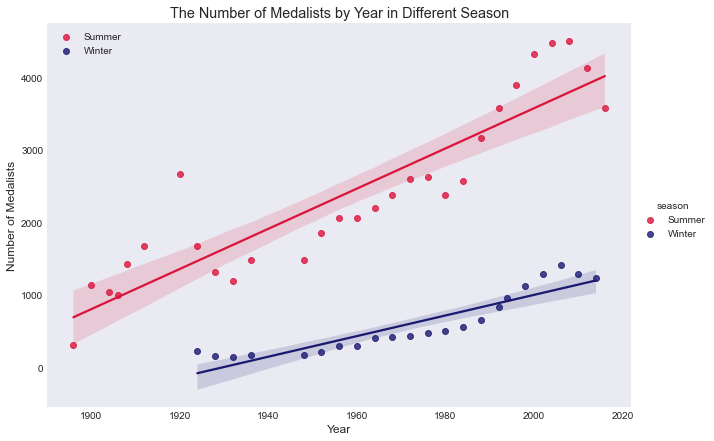

In [434]:
sns.lmplot(x='year',y='medalists', data=season_medalists, hue='season', height=6, aspect=1.5, palette=dict(Summer="crimson", Winter="midnightblue"))
plt.xlabel('Year')
plt.ylabel('Number of Medalists')
plt.title('The Number of Medalists by Year in Different Season')
plt.legend(loc='upper left')
plt.show()

Here we can infer that it is better to split data by season.

In [246]:
summer_medalists = pd.read_sql('''SELECT 
                                     Games.year,
                                     Games.games,
                                     COUNT(Athletes.athlete_ID) AS medalists
                                 FROM
                                     Athletes
                                 INNER JOIN
                                     Games
                                 ON
                                     Athletes.athlete_ID = Games.athlete_ID
                                WHERE
                                    Games.season = "Summer"
                                 GROUP BY
                                     Games.year,
                                     Games.games
                                 ORDER BY
                                     Games.year''', con=con)
winter_medalists = pd.read_sql('''SELECT 
                                     Games.year,
                                     Games.games,
                                     COUNT(Athletes.athlete_ID) AS medalists
                                 FROM
                                     Athletes
                                 INNER JOIN
                                     Games
                                 ON
                                     Athletes.athlete_ID = Games.athlete_ID
                                WHERE
                                    Games.season = "Winter"
                                 GROUP BY
                                     Games.year,
                                     Games.games
                                 ORDER BY
                                     Games.year''', con=con)

In [247]:
summer_medalists

,year,games,medalists
0,1896,1896 Summer,317
1,1900,1900 Summer,1143
2,1904,1904 Summer,1039
3,1906,1906 Summer,1001
4,1908,1908 Summer,1424
5,1912,1912 Summer,1683
6,1920,1920 Summer,2669
7,1924,1924 Summer,1677
8,1928,1928 Summer,1324
9,1932,1932 Summer,1190


In [248]:
winter_medalists

,year,games,medalists
0,1924,1924 Winter,232
1,1928,1928 Winter,164
2,1932,1932 Winter,146
3,1936,1936 Winter,173
4,1948,1948 Winter,182
5,1952,1952 Winter,218
6,1956,1956 Winter,298
7,1960,1960 Winter,296
8,1964,1964 Winter,407
9,1968,1968 Winter,430


The relationship between the olympic athletes and years

In [259]:
sportsstats = pd.read_sql('''SELECT * FROM sportsstats''', con=con)

In [262]:
%%sql

SELECT 
    Year,
    Games,
    Season,
    COUNT(ID) AS athletes
FROM
    sportsstats
GROUP BY
    Year,
    Games,
    Season
ORDER BY
    Year

 * sqlite:///project.db
Done.


Year,Games,Season,athletes
1896,1896 Summer,Summer,380
1900,1900 Summer,Summer,1936
1904,1904 Summer,Summer,1301
1906,1906 Summer,Summer,1733
1908,1908 Summer,Summer,3101
1912,1912 Summer,Summer,4040
1920,1920 Summer,Summer,4292
1924,1924 Summer,Summer,5233
1924,1924 Winter,Winter,460
1928,1928 Summer,Summer,4992


In [437]:
season_athletes = pd.read_sql('''SELECT 
                                     Year,
                                     Games,
                                     Season,
                                     COUNT(ID) AS athletes
                                 FROM
                                     sportsstats
                                 GROUP BY
                                     Year,
                                     Games,
                                     Season
                                 ORDER BY
                                     Year''', con=con)

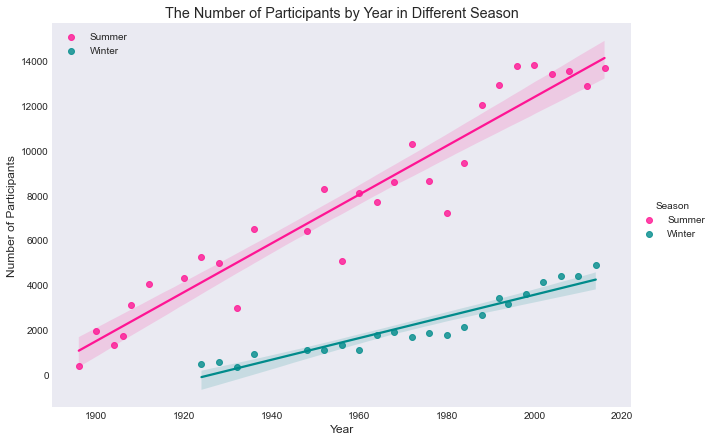

In [445]:
sns.lmplot(x='Year',y='athletes', data=season_athletes, hue='Season', height=6, aspect=1.5, palette=dict(Summer="deeppink", Winter="darkcyan"))
plt.xlabel('Year')
plt.ylabel('Number of Participants')
plt.title('The Number of Participants by Year in Different Season')
plt.legend(loc='upper left')
plt.show()

Visualize the difference between the number of medal winners and the number of all participants by season.

In [286]:
summer_athletes = pd.read_sql('''SELECT 
                                     Year,
                                     Games,
                                     Season,
                                     COUNT(ID) AS athletes
                                 FROM
                                     sportsstats
                                 WHERE
                                     Season = 'Summer'
                                 GROUP BY
                                     Year,
                                     Games,
                                     Season
                                 ORDER BY
                                     Year''', con=con)

In [287]:
winter_athletes = pd.read_sql('''SELECT 
                                     Year,
                                     Games,
                                     Season,
                                     COUNT(ID) AS athletes
                                 FROM
                                     sportsstats
                                 WHERE
                                     Season = 'Winter'
                                 GROUP BY
                                     Year,
                                     Games,
                                     Season
                                 ORDER BY
                                     Year''', con=con)

In [288]:
summer = pd.merge(summer_medalists, summer_athletes, left_on='games', right_on='Games', how='inner')
winter = pd.merge(winter_medalists, winter_athletes, left_on='games', right_on='Games', how='inner')

In [289]:
summer = summer[['year', 'games', 'Season', 'medalists', 'athletes']]
winter = winter[['year', 'games', 'Season', 'medalists', 'athletes']]
display(summer)
display(winter)

,year,games,Season,medalists,athletes
0,1896,1896 Summer,Summer,317,380
1,1900,1900 Summer,Summer,1143,1936
2,1904,1904 Summer,Summer,1039,1301
3,1906,1906 Summer,Summer,1001,1733
4,1908,1908 Summer,Summer,1424,3101
5,1912,1912 Summer,Summer,1683,4040
6,1920,1920 Summer,Summer,2669,4292
7,1924,1924 Summer,Summer,1677,5233
8,1928,1928 Summer,Summer,1324,4992
9,1932,1932 Summer,Summer,1190,2969


,year,games,Season,medalists,athletes
0,1924,1924 Winter,Winter,232,460
1,1928,1928 Winter,Winter,164,582
2,1932,1932 Winter,Winter,146,352
3,1936,1936 Winter,Winter,173,895
4,1948,1948 Winter,Winter,182,1075
5,1952,1952 Winter,Winter,218,1088
6,1956,1956 Winter,Winter,298,1307
7,1960,1960 Winter,Winter,296,1116
8,1964,1964 Winter,Winter,407,1778
9,1968,1968 Winter,Winter,430,1891


In [457]:
summer_medalists_ratio = summer
winter_medalists_ratio = winter

In [464]:
summer_medalists_ratio['ratio'] = (summer_medalists_ratio['medalists'] / summer_medalists_ratio['athletes']).round(3) * 100
summer_medalists_ratio['ratio']

0     83.4
1     59.0
2     79.9
3     57.8
4     45.9
5     41.7
6     62.2
7     32.0
8     26.5
9     40.1
10    22.8
11    23.3
12    22.5
13    40.7
14    25.5
15    28.6
16    27.8
17    25.2
18    30.4
19    33.2
20    27.3
21    26.4
22    27.6
23    28.4
24    31.4
25    33.3
26    33.2
27    32.0
28    26.2
Name: ratio, dtype: float64

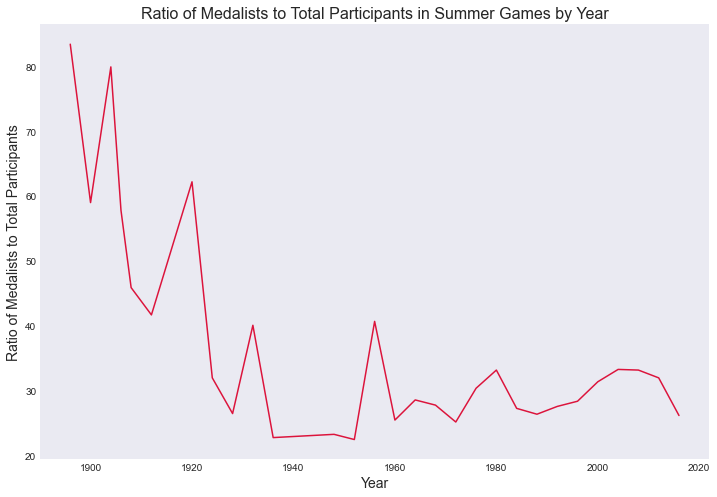

In [468]:
fig = plt.figure(figsize=(12,8))
sns.lineplot(x='year', y='ratio', data=summer_medalists_ratio, color='crimson')
plt.xlabel('Year', size=14)
plt.ylabel('Ratio of Medalists to Total Participants', size=14)
plt.title('Ratio of Medalists to Total Participants in Summer Games by Year', size=16)
plt.show()

In [469]:
winter_medalists_ratio['ratio'] = (winter_medalists_ratio['medalists'] / winter_medalists_ratio['athletes']).round(3) * 100
winter_medalists_ratio['ratio']

0     50.4
1     28.2
2     41.5
3     19.3
4     16.9
5     20.0
6     22.8
7     26.5
8     22.9
9     22.7
10    26.1
11    25.7
12    28.9
13    26.4
14    25.0
15    24.6
16    30.3
17    31.3
18    31.4
19    32.2
20    29.3
21    25.3
Name: ratio, dtype: float64

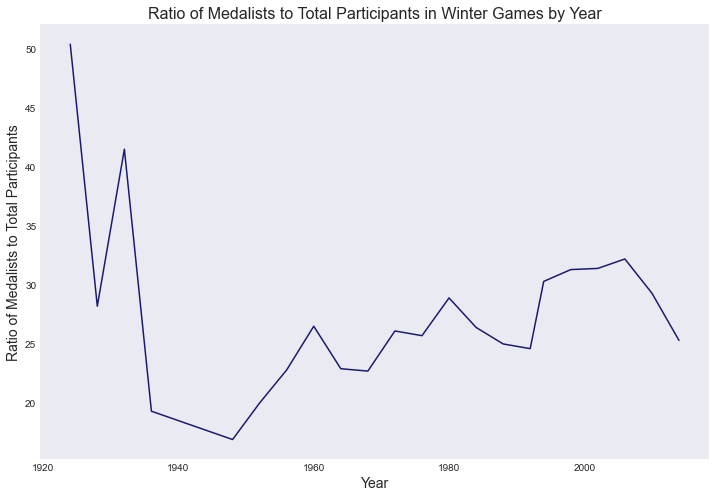

In [470]:
fig = plt.figure(figsize=(12,8))
sns.lineplot(x='year', y='ratio', data=winter_medalists_ratio, color='midnightblue')
plt.xlabel('Year', size=14)
plt.ylabel('Ratio of Medalists to Total Participants', size=14)
plt.title('Ratio of Medalists to Total Participants in Winter Games by Year', size=16)
plt.show()

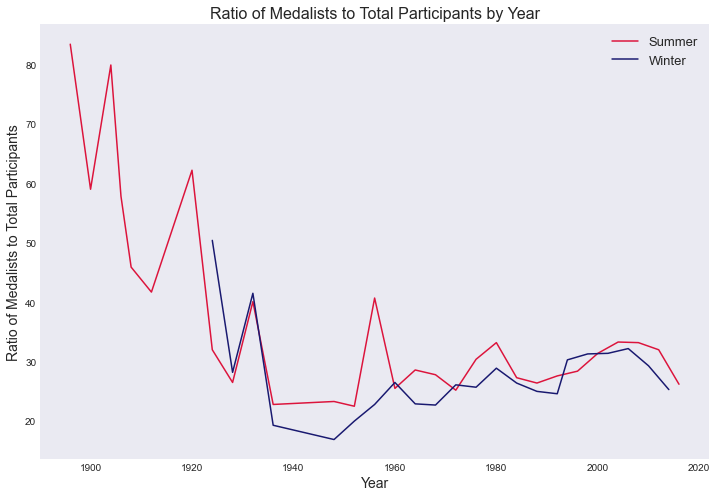

In [473]:
fig = plt.figure(figsize=(12,8))
sns.lineplot(x='year', y='ratio', data=summer_medalists_ratio, color='crimson', label='Summer')
sns.lineplot(x='year', y='ratio', data=winter_medalists_ratio, color='midnightblue', label='Winter')
plt.xlabel('Year', size=14)
plt.ylabel('Ratio of Medalists to Total Participants', size=14)
plt.title('Ratio of Medalists to Total Participants by Year', size=16)
plt.legend(loc='upper right', fontsize=13)
plt.show()

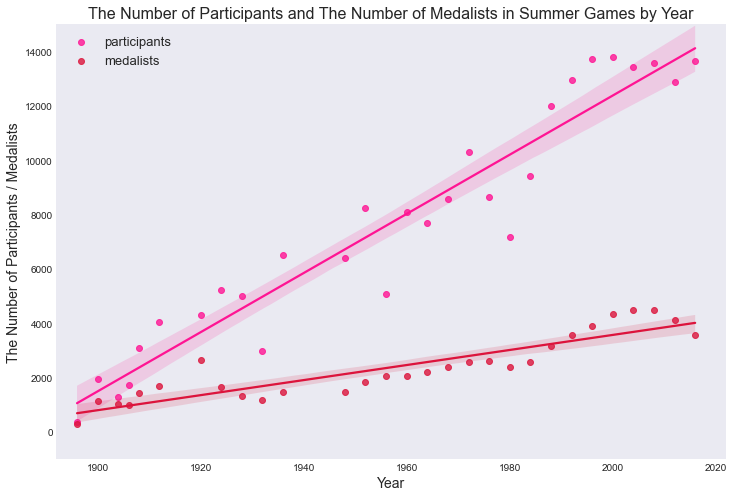

In [454]:
fig = plt.figure(figsize=(12,8))
sns.regplot(x='year', y='athletes', data=summer, color='deeppink', label='participants')
sns.regplot(x='year', y='medalists', data=summer, color='crimson', label='medalists')
plt.xlabel('Year', size=14)
plt.ylabel('The Number of Participants / Medalists', size=14)
plt.title('The Number of Participants and The Number of Medalists in Summer Games by Year', size=16)
plt.legend(loc='upper left', fontsize=13)
plt.xlim(1892, 2022)
plt.ylim(-1000, 15000)
plt.show()

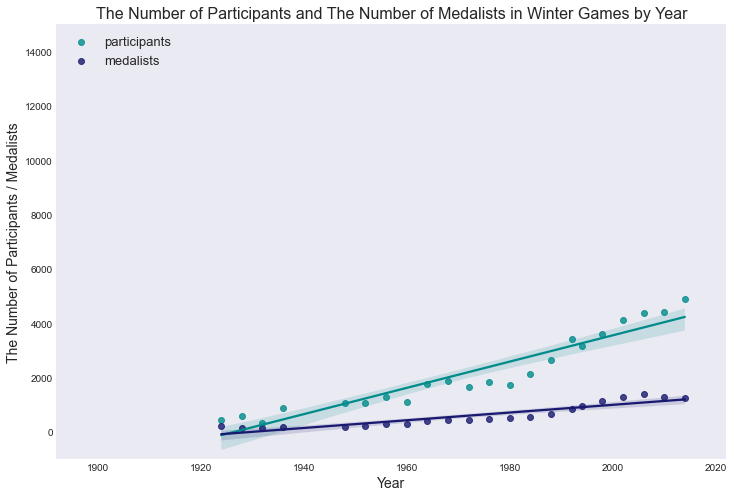

In [453]:
fig = plt.figure(figsize=(12,8))
sns.regplot(x='year', y='athletes', data=winter, color='darkcyan', label='participants')
sns.regplot(x='year', y='medalists', data=winter, color='midnightblue', label='medalists')
plt.xlabel('Year', size=14)
plt.ylabel('The Number of Participants / Medalists', size=14)
plt.title('The Number of Participants and The Number of Medalists in Winter Games by Year', size=16)
plt.legend(loc='upper left', fontsize=13)
plt.xlim(1892, 2022)
plt.ylim(-1000, 15000)
plt.show()

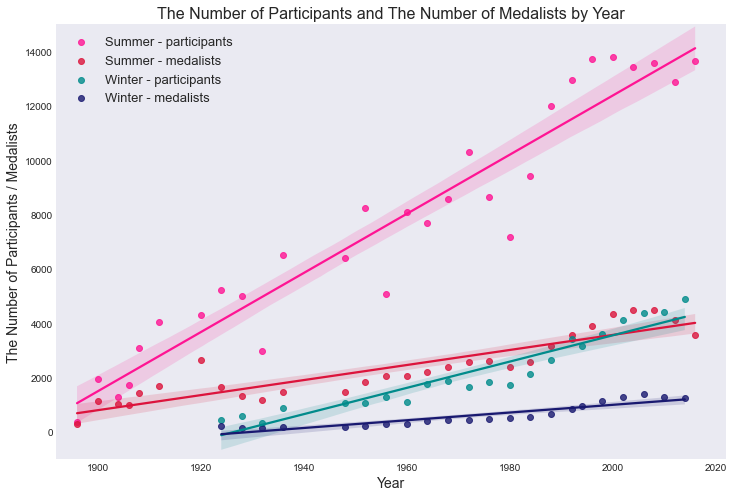

In [455]:
fig = plt.figure(figsize=(12,8))
sns.regplot(x='year', y='athletes', data=summer, color='deeppink', label='Summer - participants')
sns.regplot(x='year', y='medalists', data=summer, color='crimson', label='Summer - medalists')
sns.regplot(x='year', y='athletes', data=winter, color='darkcyan', label='Winter - participants')
sns.regplot(x='year', y='medalists', data=winter, color='midnightblue', label='Winter - medalists')
plt.xlabel('Year', size=14)
plt.ylabel('The Number of Participants / Medalists', size=14)
plt.title('The Number of Participants and The Number of Medalists by Year', size=16)
plt.legend(loc='upper left', fontsize=13)
plt.xlim(1892, 2022)
plt.ylim(-1000, 15000)
plt.show()

### Relationship between the year of the Olympics and the number of events

In [319]:
%%sql

SELECT
    year,
    COUNT(DISTINCT(event)) AS number_of_events
FROM
    Games
INNER JOIN
    Athletes
ON
    Games.athlete_ID = Athletes.athlete_ID
WHERE
    season = 'Summer'
GROUP BY
    year
ORDER BY
    year

 * sqlite:///project.db
Done.


year,number_of_events
1896,43
1900,89
1904,95
1906,74
1908,109
1912,107
1920,156
1924,130
1928,120
1932,126


In [320]:
year_events_summer = pd.read_sql('''SELECT
                                        year,
                                        COUNT(DISTINCT(event)) AS number_of_events
                                    FROM
                                        Games
                                    INNER JOIN
                                        Athletes
                                    ON
                                        Games.athlete_ID = Athletes.athlete_ID
                                    WHERE
                                        season = 'Summer'
                                    GROUP BY
                                        year
                                    ORDER BY
                                        year''', con=con)

In [321]:
year_events_winter = pd.read_sql('''SELECT
                                        year,
                                        COUNT(DISTINCT(event)) AS number_of_events
                                    FROM
                                        Games
                                    INNER JOIN
                                        Athletes
                                    ON
                                        Games.athlete_ID = Athletes.athlete_ID
                                    WHERE
                                        season = 'Winter'
                                    GROUP BY
                                        year
                                    ORDER BY
                                        year''', con=con)

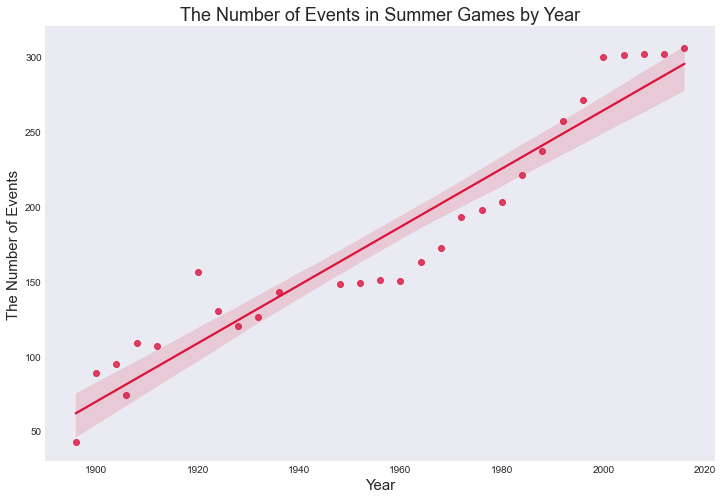

In [327]:
plt.figure(figsize=(12,8))
sns.regplot(x='year', y='number_of_events', data=year_events_summer, color='crimson', label='The Number of Events')
plt.xlabel('Year', size=15)
plt.ylabel('The Number of Events', size=15)
plt.title('The Number of Events in Summer Games by Year', size=18)
plt.show()

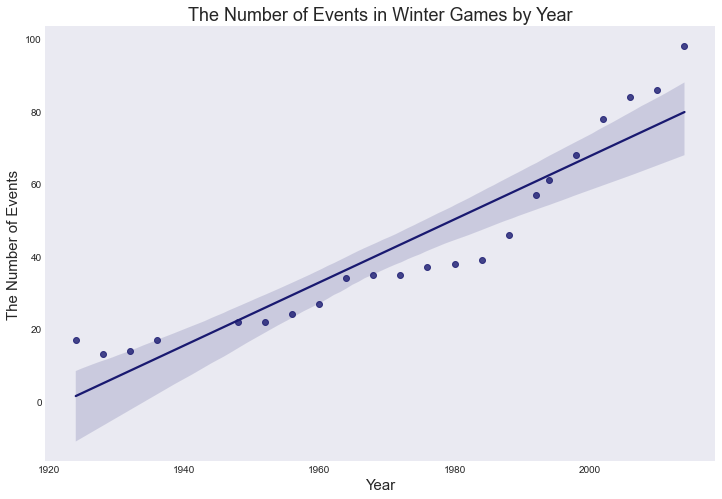

In [330]:
plt.figure(figsize=(12,8))
sns.regplot(x='year', y='number_of_events', data=year_events_winter, color='midnightblue', label='The Number of Events')
plt.xlabel('Year', size=15)
plt.ylabel('The Number of Events', size=15)
plt.title('The Number of Events in Winter Games by Year', size=18)
plt.show()

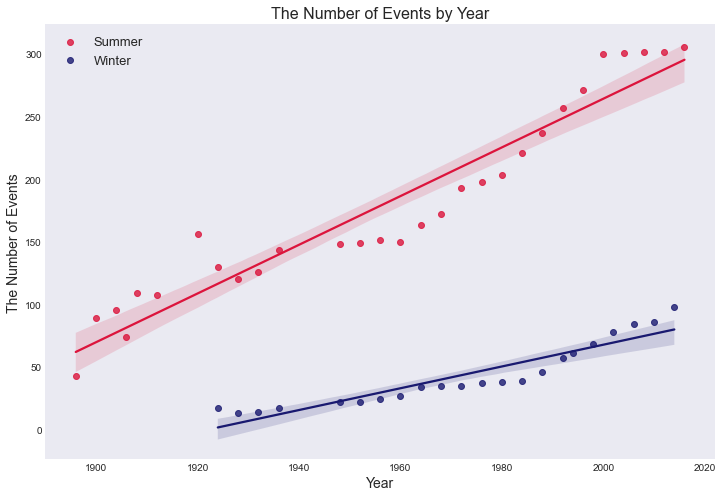

In [477]:
plt.figure(figsize=(12,8))
sns.regplot(x='year', y='number_of_events', data=year_events_summer, color='crimson', label='Summer')
sns.regplot(x='year', y='number_of_events', data=year_events_winter, color='midnightblue', label='Winter')
plt.xlabel('Year', size=14)
plt.ylabel('The Number of Events', size=14)
plt.title('The Number of Events by Year', size=16)
plt.legend(loc='upper left', fontsize=13)
plt.show()

---

### What country do the athletes who won more than one medals belong to? What percentage of athletes belong to the United States among them?​

In [376]:
%%sql


SELECT
    more_than_one.athlete_ID,
    more_than_one.athlete_name,
    more_than_one.number_of_medals,
    Regions.region,
    Regions.region
FROM
    Regions
INNER JOIN
    (
    SELECT
        athlete_ID,
        athlete_name,
        number_of_medals
    FROM
        (
        SELECT 
            athlete_ID,
            athlete_name,
            COUNT(medal) AS number_of_medals
        FROM
            Athletes
        GROUP BY
            athlete_ID,
            athlete_name    
        ) medalists_with_medals
    WHERE
        number_of_medals >= 2
    ) more_than_one
ON
    Regions.athlete_ID = more_than_one.athlete_ID
GROUP BY
    more_than_one.athlete_ID,
    more_than_one.athlete_name,
    more_than_one.number_of_medals,
    Regions.team,
    Regions.region
ORDER BY
    more_than_one.number_of_medals DESC
LIMIT
    10


 * sqlite:///project.db
Done.


athlete_ID,athlete_name,number_of_medals,region,region_1
94406,"Michael Fred Phelps, II",28,USA,USA
67046,Larysa Semenivna Latynina (Diriy-),18,Russia,Russia
4198,Nikolay Yefimovich Andrianov,15,Russia,Russia
11951,Ole Einar Bjrndalen,13,Norway,Norway
74420,Edoardo Mangiarotti,13,Italy,Italy
89187,Takashi Ono,13,Japan,Japan
109161,Borys Anfiyanovych Shakhlin,13,Russia,Russia
23426,Natalie Anne Coughlin (-Hall),12,USA,USA
35550,Birgit Fischer-Schmidt,12,Germany,Germany
35550,Birgit Fischer-Schmidt,12,Germany,Germany


In [351]:
%%sql


SELECT
    Regions.team,
    COUNT(DISTINCT(more_than_one.athlete_ID)) AS count_medalists
FROM
    Regions
INNER JOIN
    (
    SELECT
        athlete_ID,
        athlete_name,
        number_of_medals
    FROM
        (
        SELECT 
            athlete_ID,
            athlete_name,
            COUNT(medal) AS number_of_medals
        FROM
            Athletes
        GROUP BY
            athlete_ID,
            athlete_name    
        ) medalists_with_medals
    WHERE
        number_of_medals >= 2
    ) more_than_one
ON
    Regions.athlete_ID = more_than_one.athlete_ID
GROUP BY
    Regions.team
ORDER BY
    count_medalists DESC
LIMIT
    10

 * sqlite:///project.db
Done.


team,count_medalists
United States,982
Soviet Union,533
Germany,428
Great Britain,316
France,276
Italy,272
Australia,262
Sweden,253
Russia,247
Hungary,236


In [372]:
%%sql

SELECT
    team,
    ROUND(CAST(count_medalists AS FLOAT) / CAST(6993 AS FLOAT) * 100, 1) AS ratio
FROM
    (
    SELECT
        Regions.team,
        COUNT(DISTINCT(more_than_one.athlete_ID)) AS count_medalists
    FROM
        Regions
    INNER JOIN
        (
        SELECT
            athlete_ID,
            athlete_name,
            number_of_medals
        FROM
            (
            SELECT 
                athlete_ID,
                athlete_name,
                COUNT(medal) AS number_of_medals
            FROM
                Athletes
            GROUP BY
                athlete_ID,
                athlete_name    
            ) medalists_with_medals
        WHERE
            number_of_medals >= 2
        ) more_than_one
    ON
        Regions.athlete_ID = more_than_one.athlete_ID
    GROUP BY
        Regions.team
    ORDER BY
        count_medalists DESC
    LIMIT
        10
    ) team_count_medalists
GROUP BY
    team
ORDER BY
    ratio DESC

 * sqlite:///project.db
Done.


team,ratio
United States,14.0
Soviet Union,7.6
Germany,6.1
Great Britain,4.5
Italy,3.9
France,3.9
Australia,3.7
Sweden,3.6
Russia,3.5
Hungary,3.4


In [373]:
team_ratio = pd.read_sql('''SELECT
                                team,
                                ROUND(CAST(count_medalists AS FLOAT) / CAST(6993 AS FLOAT) * 100, 1) AS ratio
                            FROM
                                (
                                SELECT
                                    Regions.team,
                                    COUNT(DISTINCT(more_than_one.athlete_ID)) AS count_medalists
                                FROM
                                    Regions
                                INNER JOIN
                                    (
                                    SELECT
                                        athlete_ID,
                                        athlete_name,
                                        number_of_medals
                                    FROM
                                        (
                                        SELECT 
                                            athlete_ID,
                                            athlete_name,
                                            COUNT(medal) AS number_of_medals
                                        FROM
                                            Athletes
                                        GROUP BY
                                            athlete_ID,
                                            athlete_name    
                                        ) medalists_with_medals
                                    WHERE
                                        number_of_medals >= 2
                                    ) more_than_one
                                ON
                                    Regions.athlete_ID = more_than_one.athlete_ID
                                GROUP BY
                                    Regions.team
                                ORDER BY
                                    count_medalists DESC
                                LIMIT
                                    10
                                ) team_count_medalists
                            GROUP BY
                                team
                            ORDER BY
                                ratio DESC''', con=con)

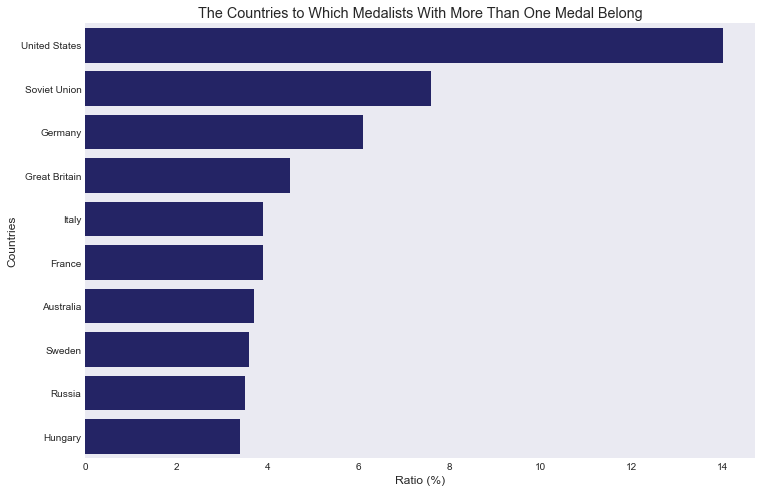

In [488]:
plt.figure(figsize=(12,8))
sns.barplot(x='ratio', y='team', data=team_ratio, color='midnightblue')
plt.xlabel('Ratio (%)')
plt.ylabel('Countries')
plt.title('The Countries to Which Medalists With More Than One Medal Belong')
plt.show()

### What is the age distribution of silver and bronze medal winners?​

Silver medalists

In [385]:
%%sql

SELECT
    Demographics.age,
    COUNT(DISTINCT(Demographics.athlete_ID)) AS count
FROM
    Demographics
INNER JOIN
    Athletes
ON
    Demographics.athlete_ID = Athletes.athlete_ID AND Athletes.medal = 'Silver'
GROUP BY
    Demographics.age
LIMIT
    10

 * sqlite:///project.db
Done.


age,count
None,277
11.0,1
12.0,3
13.0,7
14.0,28
15.0,65
16.0,134
17.0,179
18.0,340
19.0,523


In [386]:
silver_medalists_age = pd.read_sql('''SELECT
                                          Demographics.age,
                                          COUNT(DISTINCT(Demographics.athlete_ID)) AS count
                                      FROM
                                          Demographics
                                      INNER JOIN
                                          Athletes
                                      ON
                                          Demographics.athlete_ID = Athletes.athlete_ID AND Athletes.medal = 'Silver'
                                      GROUP BY
                                          Demographics.age''', con=con)
silver_medalists_age.dropna(inplace=True)

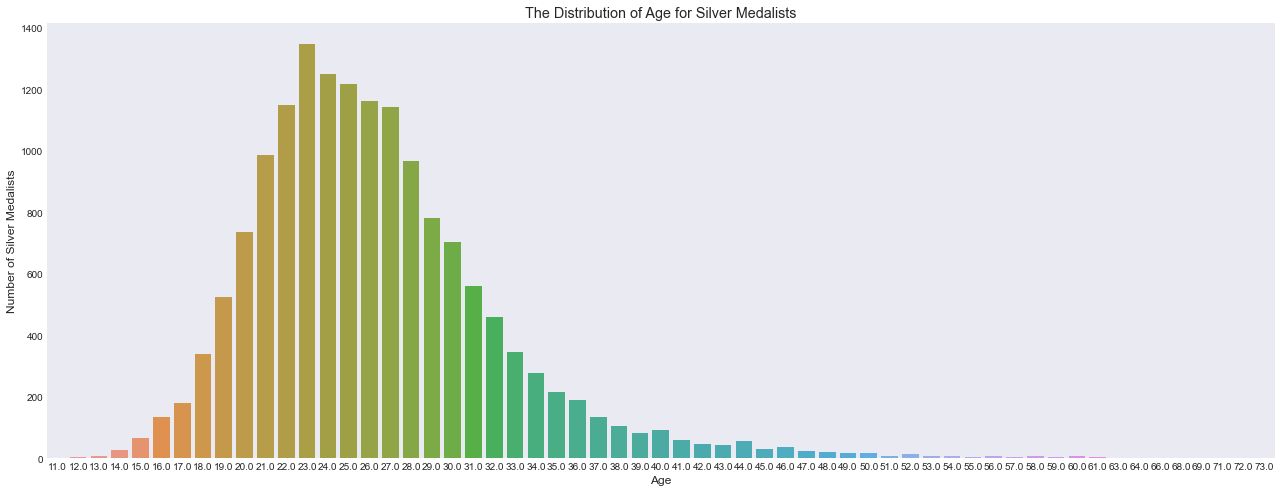

In [479]:
fig = plt.figure(figsize=(22,8))
sns.barplot(x='age',y='count', data=silver_medalists_age)
plt.xlabel('Age')
plt.ylabel('Number of Silver Medalists')
plt.title('The Distribution of Age for Silver Medalists')
plt.show()

Bronze medalists

In [388]:
%%sql

SELECT
    Demographics.age,
    COUNT(DISTINCT(Demographics.athlete_ID)) AS count
FROM
    Demographics
INNER JOIN
    Athletes
ON
    Demographics.athlete_ID = Athletes.athlete_ID AND Athletes.medal = 'Bronze'
GROUP BY
    Demographics.age
LIMIT
    10

 * sqlite:///project.db
Done.


age,count
None,278
10.0,1
12.0,3
13.0,4
14.0,21
15.0,54
16.0,112
17.0,201
18.0,329
19.0,535


In [389]:
bronze_medalists_age = pd.read_sql('''SELECT
                                          Demographics.age,
                                          COUNT(DISTINCT(Demographics.athlete_ID)) AS count
                                      FROM
                                          Demographics
                                      INNER JOIN
                                          Athletes
                                      ON
                                          Demographics.athlete_ID = Athletes.athlete_ID AND Athletes.medal = 'Bronze'
                                      GROUP BY
                                          Demographics.age''', con=con)
bronze_medalists_age.dropna(inplace=True)

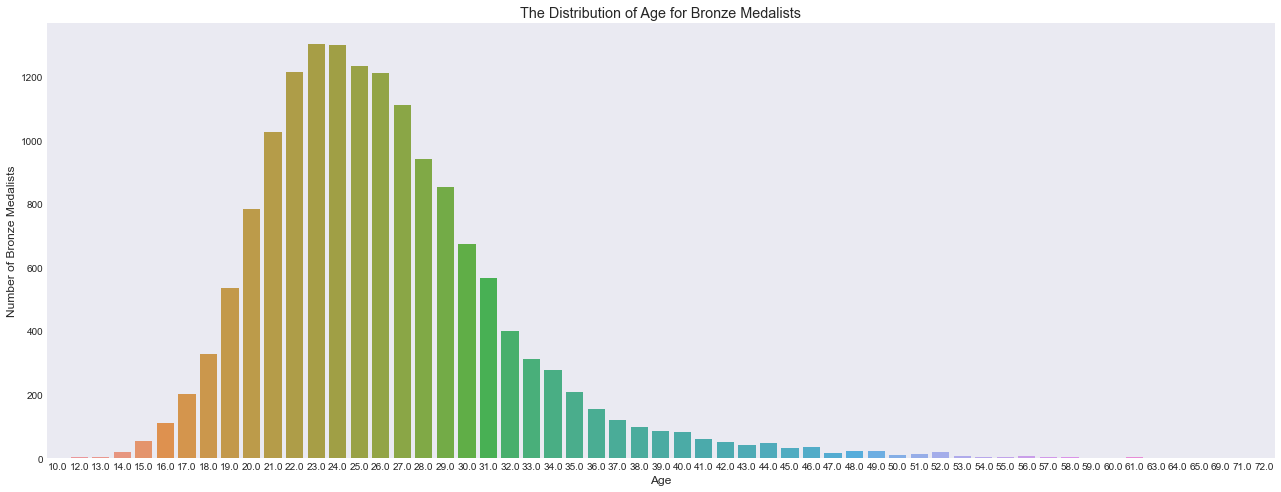

In [480]:
fig = plt.figure(figsize=(22,8))
sns.barplot(x='age',y='count', data=bronze_medalists_age)
plt.xlabel('Age')
plt.ylabel('Number of Bronze Medalists')
plt.title('The Distribution of Age for Bronze Medalists')
plt.show()

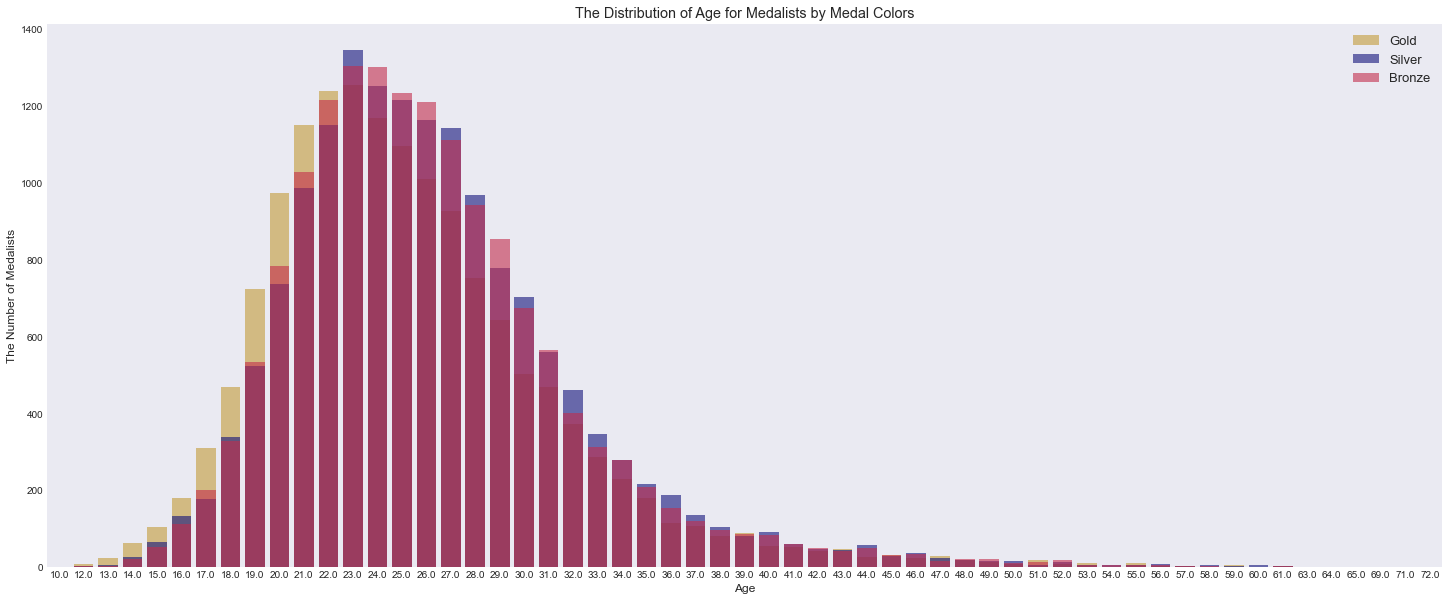

In [481]:
fig = plt.figure(figsize=(25,10))
sns.barplot(x='age',y='count', data=gold_medalists_age, alpha=0.6, color='goldenrod', label='Gold')
sns.barplot(x='age',y='count', data=silver_medalists_age, alpha=0.6, color='darkblue', label='Silver')
sns.barplot(x='age',y='count', data=bronze_medalists_age, alpha=0.6, color='crimson', label='Bronze')
plt.xlabel('Age')
plt.ylabel('The Number of Medalists')
plt.title('The Distribution of Age for Medalists by Medal Colors')
plt.legend(loc='upper right', fontsize=13)
plt.show()

---

### What is the distribution of the countries to which the silver and bronze medal winners belong?​

Silver medalists

In [482]:
%%sql

SELECT
    Regions.team,
    COUNT(DISTINCT(Regions.athlete_ID)) AS count
FROM
    Regions
INNER JOIN
    Athletes
ON
    Regions.athlete_ID = Athletes.athlete_ID AND Athletes.medal = 'Silver'
GROUP BY
    Regions.team
ORDER BY
    count DESC
LIMIT
    15

 * sqlite:///project.db
Done.


team,count
United States,1331
Soviet Union,623
Germany,558
Great Britain,520
France,454
Italy,429
Sweden,402
Australia,381
Canada,376
Russia,315


In [483]:
silver_medalists_countries = pd.read_sql('''SELECT
                                              Regions.team,
                                              COUNT(DISTINCT(Regions.athlete_ID)) AS count
                                          FROM
                                              Regions
                                          INNER JOIN
                                              Athletes
                                          ON
                                              Regions.athlete_ID = Athletes.athlete_ID AND Athletes.medal = 'Silver'
                                          GROUP BY
                                              Regions.team
                                          ORDER BY
                                              count DESC
                                          LIMIT
                                              15''', con=con)

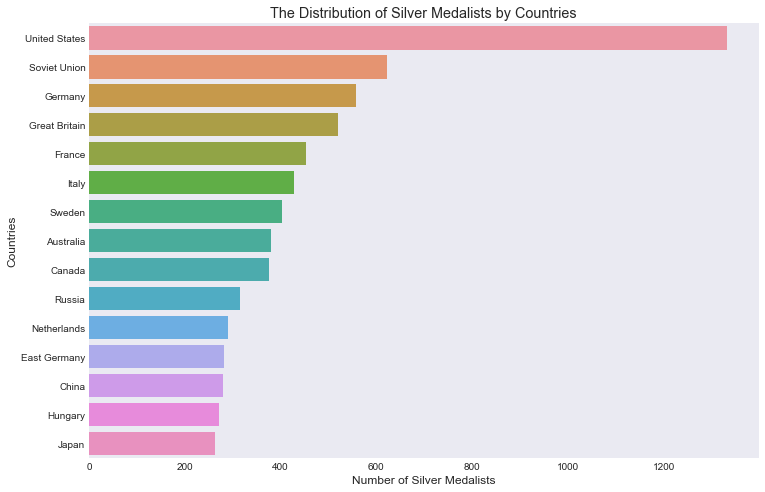

In [484]:
fig = plt.figure(figsize=(12,8))
sns.barplot(x='count',y='team', data=silver_medalists_countries)
plt.xlabel('Number of Silver Medalists')
plt.ylabel('Countries')
plt.title('The Distribution of Silver Medalists by Countries')
plt.show()

Bronze medalists

In [485]:
%%sql

SELECT
    Regions.team,
    COUNT(DISTINCT(Regions.athlete_ID)) AS count
FROM
    Regions
INNER JOIN
    Athletes
ON
    Regions.athlete_ID = Athletes.athlete_ID AND Athletes.medal = 'Bronze'
GROUP BY
    Regions.team
ORDER BY
    count DESC
LIMIT
    15

 * sqlite:///project.db
Done.


team,count
United States,1126
Germany,622
Soviet Union,619
Great Britain,535
France,525
Sweden,442
Australia,427
Italy,422
Canada,367
Russia,365


In [486]:
bronze_medalists_countries = pd.read_sql('''SELECT
                                              Regions.team,
                                              COUNT(DISTINCT(Regions.athlete_ID)) AS count
                                          FROM
                                              Regions
                                          INNER JOIN
                                              Athletes
                                          ON
                                              Regions.athlete_ID = Athletes.athlete_ID AND Athletes.medal = 'Bronze'
                                          GROUP BY
                                              Regions.team
                                          ORDER BY
                                              count DESC
                                          LIMIT
                                              15''', con=con)

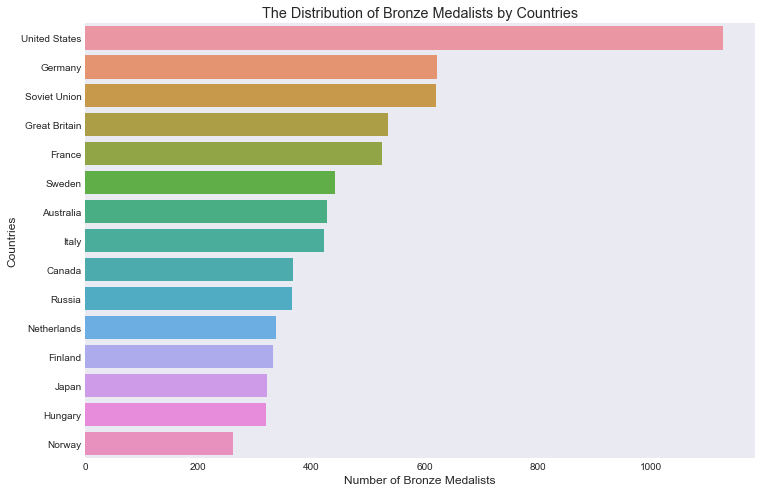

In [487]:
fig = plt.figure(figsize=(12,8))
sns.barplot(x='count',y='team', data=bronze_medalists_countries)
plt.xlabel('Number of Bronze Medalists')
plt.ylabel('Countries')
plt.title('The Distribution of Bronze Medalists by Countries')
plt.show()

---

### New Metrics

#### number_of_medals

This metric stores the number of medals an athlete won. I created this to extract the medalists with more than a given number of medals.​

In [343]:
%%sql

SELECT
    athlete_ID,
    athlete_name,
    COUNT(medal) AS number_of_medals
FROM
    Athletes
GROUP BY
    athlete_ID,
    athlete_name
LIMIT
    10

 * sqlite:///project.db
Done.


athlete_ID,athlete_name,number_of_medals
4,Edgar Lindenau Aabye,1
15,Arvo Ossian Aaltonen,2
16,Juhamatti Tapio Aaltonen,1
17,Paavo Johannes Aaltonen,5
20,Kjetil Andr Aamodt,8
21,Ragnhild Margrethe Aamodt,1
25,Alf Lied Aanning,1
29,Willemien Aardenburg,1
30,Pepijn Aardewijn,1
37,Ann Kristin Aarnes,1


This metric is helpful, for example, when extracting medalists with more than 5 medals

In [342]:
%%sql

SELECT
    athlete_ID,
    athlete_name,
    number_of_medals
FROM
    (
    SELECT 
        athlete_ID,
        athlete_name,
        COUNT(medal) AS number_of_medals
    FROM
        Athletes
    GROUP BY
        athlete_ID,
        athlete_name    
    ) medalists_with_medals
WHERE
    number_of_medals >= 5
ORDER BY
    number_of_medals DESC
LIMIT
    10

 * sqlite:///project.db
Done.


athlete_ID,athlete_name,number_of_medals
94406,"Michael Fred Phelps, II",28
67046,Larysa Semenivna Latynina (Diriy-),18
4198,Nikolay Yefimovich Andrianov,15
11951,Ole Einar Bjrndalen,13
74420,Edoardo Mangiarotti,13
89187,Takashi Ono,13
109161,Borys Anfiyanovych Shakhlin,13
23426,Natalie Anne Coughlin (-Hall),12
35550,Birgit Fischer-Schmidt,12
57998,Sawao Kato,12


The number of medalists who won more than one medal

In [422]:
%%sql

SELECT
    COUNT(DISTINCT(athlete_ID))
FROM
    (
    SELECT 
        athlete_ID,
        athlete_name,
        COUNT(medal) AS number_of_medals
    FROM
        Athletes
    GROUP BY
        athlete_ID,
        athlete_name    
    ) medalists_with_medals
WHERE
    number_of_medals > 1

 * sqlite:///project.db
Done.


COUNT(DISTINCT(athlete_ID))
6993


#### ratio​_medalists_country

This metric represents the ratio of medalists from each country to the total number of medalists with more than one medal. I created this to visualize how the countries of medalists with more than one medal are distributed.​

#### ratio_medalists_participants

This metric represents the ratio of medalists to total participants. I created this to visualize how the difficulty to be medalists changed through years.

---